<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
 <h2>Mentoría: Detección de objetos en imágenes </h2>
</center>



El objetivo de esta notebook es obtener una dataFrame que podamos utilizar a lo largo de la mentoría a partir del cojunto de datos [Deuba](https://gitlab.com/ciiiutnfrc/deuba). 

**Imágenes: Conceptos Básicos**

*Basado en el [Curso-Taller 2019: Aprendizaje Automático e Imágenes en Python](https://github.com/vrulloni/MLIP)*


Podemos definir una imagen como una función o arreglo bidimensional f(x1,x2) donde x=(x1,x2) son las coordenadas espaciales, y el valor de f en cualquier x es la intensidad de la imagen en dicho punto, si es en grises o binaria.

Si es en color hay 3 valores de intensidad, uno por cada canal: R, G y B (red, green, blue).

Si es imagen satelital hay tantos valores como bandas o canales tenga la imagen (depende de la cantidad de sensores).

El tamaño de la imagen monocroma (en grises) es el número de filas por el número de columnas, M×N. Cada punto corresponde a un píxel. Si es a color: M×Nx3. Si es salelital: M×Nxk donde k es la cantidad de bandas (espectrales).


*Resolución de la imagen:* dada por la cantidad de píxeles

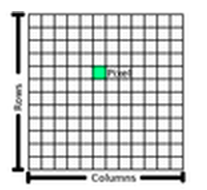

In [ ]:
Imge('raster_dataset.png')

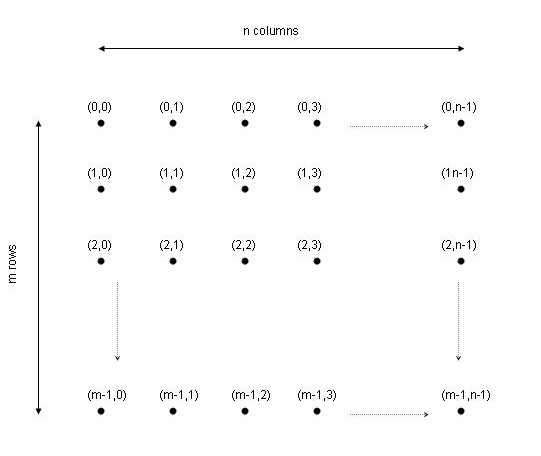

In [ ]:
Imge('coordnadas.jpg')

La indexación de la imagen en Python sigue la convención habitual, comenzando en 0.

En el caso de imágenes en gris, al pixel le corresponde un número que es el valor de intensidad I(x,y).
En el caso de imágenes en color el tamaño del array será MxNx3. almacenando así en cada posición la intensidad de cada canal R, G y B. R será (x,y,1), G (x,y,2) y, por último, B (x,y,3). 

Si la intensidad se almacena como entero sin signo de 8 bits (uint8), su valor pertenece al intervalo [0 255].
        0 corresponde al negro                   255 corresponde al blanco.

Si la intensidad se almacena como entero de 16 bits (uint16) significa que pertenece al intervalo [0 65535], ya que corresponde a un entero sin signo de 16 bits.

Si la imagen es binaria, la intensidad toma solo los valores 0 o 1.

La coordenada (0,0) corresponde a la esquina superior izquierda de la imagen.
La coordenada (M-1, N-1) a la esquina inferior derecha.

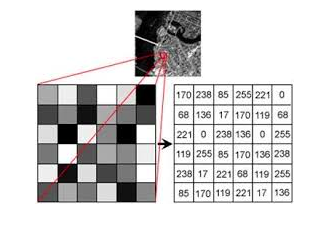

In [ ]:
Imge('explicaimagen.jpg')

Hay dos formas de ejecutar lo siguiente, pueden hacerlo en su compu personal o en el Colab.

#### **Computadora personal**: 
Clonar el repositorio donde están las imágenes: y luego moverse entre las carpetas. 

Yo utilizo Debian, voy a usar comandos de copiar y mover carpetas de ese sistema operativo, sinceramente no sé si funciona lo siguiente que les comento en Windows (quizás puedan usar Docker? -> Google nuestro buen amigo)



##### *Creación del entorno:*

Vamos a tener que instalar varias librerías. Para no comprometer los programas del sistema, sugiero que creen un entorno: 

In [ ]:
#https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html

Desde la terminal: 

*$ conda create --name mentoria_img*

*$ conda activate mentoria_img*

pasará de *(base) -> (mentoria_img)*

Ahora si, podemos instalar las librerías necesarias, por única vez. 

Se puede hacerlo de consola con 

*$ pip install <paquete>*



o desde esta misma notebook como 

*! pip install <paquete>*

##### **Google Colab:** 

Antes de vincular su Drive con el Colab, tienen que tener el 'path' a la carpeta donde están los archivos. Acá está el [link](https://drive.google.com/drive/folders/1h1hHcEqzdruIsngERX8wdFjB2sM0S_aw?usp=sharing), es carpeta compartida



Para conectar con el Drive, corran la siguiente celda y hagan click en el enlace azul. En la nueva ventana, seleccionan su cuenta de Gmail, van hasta el final de los permisos y pongan 'Permitir'.
Aparece un link negro y copien el enlace que les salta, vuelvan a la notebook y lo copian en el recuadro en blanco que aparece.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Para chequear donde están los archivos que quieren, en las pestaña del costado, hay tres íconos. Uno que tiene 3 líneas, otro que tiene '< >' y otro que tiene una carpeta. Hagan click en la carpeta y esperen un ratito (rato, depende...) que se cargue todo.

Una vez que se carga, aparecen 2 carpetas: 'drive' y 'sample_data'. Hagan click en el triangulito de 'drive'. Va a aparece 'My Drive' y todas tus carpetas del Drive. Buscá tu carpeta (hasta donde esté el dataset que necesitás) y colocando arriba el cursor, hagan click derecho y seleccionen 'Copiar la ruta de acceso'. Y esa es la que copian en 'os.chdir'. 

In [1]:
# acá podemos indicar la capeta donde queremos estar. 
# Deberán cambiar la dirección, seguramente a uds se les agregará la carpeta en compartidas, por lo que deberán cambiar 
# el path de la siguiente línea:
import os
#os.chdir('/content/drive/My Drive/Mentoria')
os.chdir('/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset')

#### A partir de aquí, es independiente si están en su computadora o en el Colab. Lo que si... si están en su compu, tengan espacio disponible, porque vamos a cortar de las imágenes, las porciones de las manos y las guardaremos en archivos '.jpg'. Y son bastantes...

In [2]:
# acá vamos importando las librerías necesarias 
# y a medida que van surgiendo por necesidad, las van sumando, para mantener un orden y poder ubicarlas rápido
from IPython.display import Image as Imge
import pandas as pd
import numpy as np
import glob

#seguimos agregando librerías necesarias:
#las que no tengan, vayan instalándolas
import cv2
import numpy as np

import matplotlib.pyplot as plt
import PIL
from PIL import Image
from os import path

#from google.colab.patches import cv2_imshow #en Colab!

#### Analizando el repo:

Dentro de la carpeta *dataset/* esta la copia del repositorio Deuba. 

Tenemos 11 carpetas con las imaǵenes y etiquetas correspondientes a las 11 secuencias de imágenes.
También tenemos los archivos de .csv con las etiquetas de los objetos de cada secuencia de imágenes. 

In [3]:
#para poder correr comandos de bash o listar las carpetas, como en este ejemplo, hay que anteponer el símbolo de exclamación:
!ls

all-frames_test				Video2-frames_train.csv
all-frames_train			Video3-frames
crop					Video3-frames_test.csv
dataSet_test_crop_features_labels.csv	Video3-frames_train.csv
dataSet_test_cropped.csv		Video4-frames
dataSet_test.csv			Video4-frames_test.csv
dataSet_train_crop_features_labels.csv	Video4-frames_train.csv
dataSet_train_cropped.csv		Video5-frames
dataSet_train.csv			Video5-frames_test.csv
DEUBa_dataset.ipynb			Video5-frames_train.csv
features.json				Video6-frames
features.py				Video6-frames_test.csv
Video10-frames				Video6-frames_train.csv
Video10-frames_test.csv			Video7-frames
Video10-frames_train.csv		Video7-frames_test.csv
Video11-frames				Video7-frames_train.csv
Video11-frames_test.csv			Video8-frames
Video11-frames_train.csv		Video8-frames_test.csv
Video1-frames				Video8-frames_train.csv
Video1-frames_test.csv			Video9-frames
Video1-frames_train.csv			Video9-frames_test.csv
Video2-frames				Video9-frames_train.csv
Video2-frames_test.csv


Dentro de cada una de las carpetas las imágenes estan separadas en las carpetas train y test.

In [4]:
! ls Video1-frames/

test  train


y dentro de estas, dos carpetas, *'train'* y *'test'*, las imágenes .jpg con sus etiquetas en .txt y en .xml, con la clase de objeto y la posición en la imagen.

In [5]:
! ls Video1-frames/train/

Video1-frame-000001.jpg  Video1-frame-000075.xml  Video1-frame-000285.txt
Video1-frame-000001.txt  Video1-frame-000076.jpg  Video1-frame-000285.xml
Video1-frame-000001.xml  Video1-frame-000076.txt  Video1-frame-000287.jpg
Video1-frame-000002.jpg  Video1-frame-000076.xml  Video1-frame-000287.txt
Video1-frame-000002.txt  Video1-frame-000078.jpg  Video1-frame-000287.xml
Video1-frame-000002.xml  Video1-frame-000078.txt  Video1-frame-000288.jpg
Video1-frame-000003.jpg  Video1-frame-000078.xml  Video1-frame-000288.txt
Video1-frame-000003.txt  Video1-frame-000079.jpg  Video1-frame-000288.xml
Video1-frame-000003.xml  Video1-frame-000079.txt  Video1-frame-000290.jpg
Video1-frame-000005.jpg  Video1-frame-000079.xml  Video1-frame-000290.txt
Video1-frame-000005.txt  Video1-frame-000080.jpg  Video1-frame-000290.xml
Video1-frame-000005.xml  Video1-frame-000080.txt  Video1-frame-000292.jpg
Video1-frame-000006.jpg  Video1-frame-000080.xml  Video1-frame-000292.txt
Video1-frame-000006.txt  Video1-frame-

Dentro de esta carpeta tenemos los archivos con las etiquetas de cada imagen en dos formatos de archivos: .txt y .xml

In [6]:
!cat Video1-frames/train/Video1-frame-000001.txt

1 0.51796875 0.26944444444444443 0.0859375 0.21666666666666667


In [7]:
!cat Video1-frames/train/Video1-frame-000001.xml

<annotation>
	<folder>Video1-frames</folder>
	<filename>Video1-frame-000001.jpg</filename>
	<path>/home/gonzalo/CIII/dataset_barbijos/Video1-frames/Video1-frame-000001.jpg</path>
	<source>
		<database>Unknown</database>
	</source>
	<size>
		<width>640</width>
		<height>360</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>csb</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>304</xmin>
			<ymin>58</ymin>
			<xmax>359</xmax>
			<ymax>136</ymax>
		</bndbox>
	</object>
</annotation>

Estas estiquetas nos indican la clase del objeto y su posición (en coodenadas de pixel) en la imagen.

Dentro del repo se encuentran otros tres directorios: *all-frames-train/*, *all-frames-test/* y *crop/*.

 * *all-frames-train/*: todas la imagenes utilizadas para entrenamiento.
 * *all-frames-test/*: todas la imagenes utilizadas para entrenamiento.

Dentro de *crop/* tenemos las imagenes de los objetos etiquetados tanto para train como para test. 
Estas imágenes fueron las utilizadas para armar el dataFrame para utilizar en esta materia.

A partir de los 22 'csv', extrajimos algunas características de interés (recordar que son varias carpetas, 11 en total, por lo que serán 11 csv) y armamos un solo .csv para analizar.


In [8]:
#para poder instalar paquetes por ej o listar las carpetas como en este ejemplo, hay que anteponer el símbolo de exclamación:
!ls

all-frames_test				Video2-frames_train.csv
all-frames_train			Video3-frames
crop					Video3-frames_test.csv
dataSet_test_crop_features_labels.csv	Video3-frames_train.csv
dataSet_test_cropped.csv		Video4-frames
dataSet_test.csv			Video4-frames_test.csv
dataSet_train_crop_features_labels.csv	Video4-frames_train.csv
dataSet_train_cropped.csv		Video5-frames
dataSet_train.csv			Video5-frames_test.csv
DEUBa_dataset.ipynb			Video5-frames_train.csv
features.json				Video6-frames
features.py				Video6-frames_test.csv
Video10-frames				Video6-frames_train.csv
Video10-frames_test.csv			Video7-frames
Video10-frames_train.csv		Video7-frames_test.csv
Video11-frames				Video7-frames_train.csv
Video11-frames_test.csv			Video8-frames
Video11-frames_train.csv		Video8-frames_test.csv
Video1-frames				Video8-frames_train.csv
Video1-frames_test.csv			Video9-frames
Video1-frames_train.csv			Video9-frames_test.csv
Video2-frames				Video9-frames_train.csv
Video2-frames_test.csv


In [9]:
# acá podemos indicar la capeta donde queremos estar. 
# Deberán cambiar la dirección, seguramente a uds se les agregará la carpeta en compartidas, por lo que deberán cambiar 
# el path de la siguiente línea:
os.chdir('Video1-frames/train')
! ls #son muchas!

Video1-frame-000001.jpg  Video1-frame-000075.xml  Video1-frame-000285.txt
Video1-frame-000001.txt  Video1-frame-000076.jpg  Video1-frame-000285.xml
Video1-frame-000001.xml  Video1-frame-000076.txt  Video1-frame-000287.jpg
Video1-frame-000002.jpg  Video1-frame-000076.xml  Video1-frame-000287.txt
Video1-frame-000002.txt  Video1-frame-000078.jpg  Video1-frame-000287.xml
Video1-frame-000002.xml  Video1-frame-000078.txt  Video1-frame-000288.jpg
Video1-frame-000003.jpg  Video1-frame-000078.xml  Video1-frame-000288.txt
Video1-frame-000003.txt  Video1-frame-000079.jpg  Video1-frame-000288.xml
Video1-frame-000003.xml  Video1-frame-000079.txt  Video1-frame-000290.jpg
Video1-frame-000005.jpg  Video1-frame-000079.xml  Video1-frame-000290.txt
Video1-frame-000005.txt  Video1-frame-000080.jpg  Video1-frame-000290.xml
Video1-frame-000005.xml  Video1-frame-000080.txt  Video1-frame-000292.jpg
Video1-frame-000006.jpg  Video1-frame-000080.xml  Video1-frame-000292.txt
Video1-frame-000006.txt  Video1-frame-

*Visualización con OpenCv*

In [16]:
#son muchas! elegimos cuaquiera para visualizar:
picture =  'Video1-frame-000001.jpg'
img=cv2.imread(picture)

In [17]:
print("El tipo de la primer imagen es ",type(img))
print("El tipo de cada píxel es ",type(img[0,0,0]))
print("La dimensión de la imagen es ",img.shape)

##A partir de shape podemos tomar variables con nombres más significativos
altura=img.shape[0]
ancho=img.shape[1]
canales=img.shape[2]
print("La altura es",altura,".El ancho es ",ancho,".Los canales de color son ",canales)

El tipo de la primer imagen es  <class 'numpy.ndarray'>
El tipo de cada píxel es  <class 'numpy.uint8'>
La dimensión de la imagen es  (360, 640, 3)
La altura es 360 .El ancho es  640 .Los canales de color son  3


**OJO!!!! En Jupiter Notebook:**
Para visualizar la imagen, se correr la siguiente celda, hacer click en la ventana emergente para visualizar la imagen. **Para cerrar la imágen, NO HAGAN CLICK EN LA CRUZ!!**, utilizen cualquier tecla del teclado (por ej. 'Esc').
Si lo cierran con la cruz, no dejan que OpenCV cierre la imagen por uds
y Jupyter se queda colgado, por lo que hay que resetear el kernel.

In [18]:
# Descomentar si lo corren en su computadora:

imagen = cv2.resize(img, (int(altura/2), int(ancho/6))) #se hizo resize para mejor visualización! 
cv2.imshow('imagen', imagen); cv2.waitKey(0); cv2.destroyAllWindows()

En **Colab** no sucede eso, solo se abre a continuación.

### Generación de la tabla de Features:

Necesitamos armar un dataFrame con todas las etiquetas y la información relevante de las imágenes a partir de los .csv de cada carpeta. 

Estos archivos contienen información de nombre de archivo, resolución de la imagen, clase detectada y posición del BB. 

La idea es generar un dataFrame diferente para los datos de entrenamiento (train) y otro para los de testeo (test).

Estos dataFrames los elaboraremos a partir de los datos en los archivos .csv

In [17]:
os.chdir('/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset')

In [20]:
extension = 'csv'
list_csv_files_test = [i for i in glob.glob('*test.{}'.format(extension))]
list_csv_files_train = [i for i in glob.glob('*train.{}'.format(extension))]

In [21]:
list_csv_files_train.sort()
list_csv_files_train.sort(key=len)
list_csv_files_train

['Video1-frames_train.csv',
 'Video2-frames_train.csv',
 'Video3-frames_train.csv',
 'Video4-frames_train.csv',
 'Video5-frames_train.csv',
 'Video6-frames_train.csv',
 'Video7-frames_train.csv',
 'Video8-frames_train.csv',
 'Video9-frames_train.csv',
 'Video10-frames_train.csv',
 'Video11-frames_train.csv']

In [22]:
list_csv_files_test.sort()
list_csv_files_test.sort(key=len)
list_csv_files_test

['Video1-frames_test.csv',
 'Video2-frames_test.csv',
 'Video3-frames_test.csv',
 'Video4-frames_test.csv',
 'Video5-frames_test.csv',
 'Video6-frames_test.csv',
 'Video7-frames_test.csv',
 'Video8-frames_test.csv',
 'Video9-frames_test.csv',
 'Video10-frames_test.csv',
 'Video11-frames_test.csv']

Creo un dataFrame con los datos de train:

In [23]:
list_pd_train = []
for csv_file in list_csv_files_train:
    #list_pd_train.append(pd.read_csv(csv_file).sort_values(by=['filename']))
    list_pd_train.append(pd.read_csv(csv_file))
pd_train =pd.concat(list_pd_train)
#pd_train.sort_values(by=['filename'])
pd_train['use'] = 'train'
pd_train = pd_train.rename(columns={'class': 'clase'})
pd_train

filename  width  height clase  xmin  ymin  xmax  ymax  \
0     Video1-frame-000081.jpg    640     360   csb   297    64   365   149   
1     Video1-frame-000282.jpg    640     360   ccb   399   146   452   205   
2     Video1-frame-000001.jpg    640     360   csb   304    58   359   136   
3     Video1-frame-000084.jpg    640     360   csb   298    67   365   148   
4     Video1-frame-000030.jpg    640     360   csb   301    67   367   148   
..                        ...    ...     ...   ...   ...   ...   ...   ...   
173  Video11-frame-000127.jpg   1280     720   ccb   871   209   988   340   
174  Video11-frame-000627.jpg   1280     720   ccb   581    73   732   325   
175  Video11-frame-000100.jpg   1280     720   ccb   831   186   938   342   
176  Video11-frame-000192.jpg   1280     720   ccb   874   140   976   359   
177  Video11-frame-000587.jpg   1280     720   ccb   571   114   709   326   

       use  
0    train  
1    train  
2    train  
3    train  
4    train  
..     ...  
173  train  
174  train  
175  train  
176  train  
177  train  

[1913 rows x 9 columns]

Agrego información del bounding box de cada objeto:

In [24]:
pd_train['videoname'] = pd_train['filename'].astype(str).str.split("-", 1).str.get(0)
pd_train['bb_width'] = pd_train['xmax']- pd_train['xmin']
pd_train['bb_height'] = pd_train['ymax']- pd_train['ymin']
pd_train.head(2)

filename  width  height clase  xmin  ymin  xmax  ymax  \
0  Video1-frame-000081.jpg    640     360   csb   297    64   365   149   
1  Video1-frame-000282.jpg    640     360   ccb   399   146   452   205   

     use videoname  bb_width  bb_height  
0  train    Video1        68         85  
1  train    Video1        53         59

In [25]:
pd_train.to_csv('dataSet_train.csv')

De igual manera para los datos de test:

In [26]:
list_pd_test = []
for csv_file in list_csv_files_test:
    #list_pd_test.append(pd.read_csv(csv_file).sort_values(by=['filename']))
    list_pd_test.append(pd.read_csv(csv_file))
pd_test =pd.concat(list_pd_test)
#pd_test.sort_values(by=['filename'])
pd_test['use'] = 'test'
pd_test = pd_test.rename(columns={'class': 'clase'})
pd_test

filename  width  height clase  xmin  ymin  xmax  ymax  \
0    Video1-frame-000062.jpg    640     360   csb   307    70   365   151   
1    Video1-frame-000188.jpg    640     360   ccb   255    22   329    93   
2    Video1-frame-000188.jpg    640     360   ccb   442   154   545   242   
3    Video1-frame-000021.jpg    640     360   csb   302    58   372   150   
4    Video1-frame-000384.jpg    640     360   ccb    50   185    94   239   
..                       ...    ...     ...   ...   ...   ...   ...   ...   
40  Video11-frame-000335.jpg   1280     720   ccb   796   153   939   332   
41  Video11-frame-000593.jpg   1280     720   ccb   593   104   734   323   
42  Video11-frame-000125.jpg   1280     720   ccb   862   170   970   323   
43  Video11-frame-000117.jpg   1280     720   ccb   135   150   252   298   
44  Video11-frame-000117.jpg   1280     720   ccb   876   164   979   322   

     use  
0   test  
1   test  
2   test  
3   test  
4   test  
..   ...  
40  test  
41  test  
42  test  
43  test  
44  test  

[495 rows x 9 columns]

In [27]:
pd_test['videoname'] = pd_test['filename'].astype(str).str.split("-", 1).str.get(0)
pd_test['bb_width'] = pd_test['xmax']- pd_test['xmin']
pd_test['bb_height'] = pd_test['ymax']- pd_test['ymin']
pd_test.head(2)

filename  width  height clase  xmin  ymin  xmax  ymax   use  \
0  Video1-frame-000062.jpg    640     360   csb   307    70   365   151  test   
1  Video1-frame-000188.jpg    640     360   ccb   255    22   329    93  test   

  videoname  bb_width  bb_height  
0    Video1        58         81  
1    Video1        74         71

In [28]:
pd_test.to_csv('dataSet_test.csv')

### Cortar las imágenes y guardarlas en carpetas:

Vamos a seleccionar de las imágenes, la región de los objetos. Las mismas, las vamos guardando en carpetas. 

In [344]:
#En esta carpeta, están los '.csv' generados en la primera parte de la notebook
os.chdir('/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset')
! pwd
!ls *.csv

/home/diego/Nobu/Trabajos/DiploDato2021/deuba/dataset
dataSet_test.csv			      Video3-frames_train.csv
dataSet_train_cropped_df.csv		      Video4-frames_test.csv
dataSet_train_cropped_features_labels_df.csv  Video4-frames_train.csv
dataSet_train.csv			      Video5-frames_test.csv
Video10-frames_test.csv			      Video5-frames_train.csv
Video10-frames_train.csv		      Video6-frames_test.csv
Video11-frames_test.csv			      Video6-frames_train.csv
Video11-frames_train.csv		      Video7-frames_test.csv
Video1-frames_test.csv			      Video7-frames_train.csv
Video1-frames_train.csv			      Video8-frames_test.csv
Video2-frames_test.csv			      Video8-frames_train.csv
Video2-frames_train.csv			      Video9-frames_test.csv
Video3-frames_test.csv			      Video9-frames_train.csv


In [29]:
filename_train = 'dataSet_train.csv' 
pd_train=pd.read_csv(filename_train).sort_values(by=['filename'])
pd_train = pd_train.drop(['Unnamed: 0'], axis=1)
#pd_train.groupby('filename')
pd_train.head(2)

filename  width  height clase  xmin  ymin  xmax  ymax  \
2    Video1-frame-000001.jpg    640     360   csb   304    58   359   136   
285  Video1-frame-000002.jpg    640     360   csb   300    61   363   136   

       use videoname  bb_width  bb_height  
2    train    Video1        55         78  
285  train    Video1        63         75

In [30]:
filename_test = 'dataSet_test.csv' 
pd_test=pd.read_csv(filename_test).sort_values(by=['filename'])
pd_test = pd_test.drop(['Unnamed: 0'], axis=1)
#pd_train.groupby('filename')
pd_test.head(2)

filename  width  height clase  xmin  ymin  xmax  ymax  \
25  Video1-frame-000004.jpg    640     360   csb   301    67   364   142   
3   Video1-frame-000021.jpg    640     360   csb   302    58   372   150   

     use videoname  bb_width  bb_height  
25  test    Video1        63         75  
3   test    Video1        70         92

In [345]:
# Acá creamos la carpeta para guardar las imágenes cortadas, se las crea una sola vez
os.chdir('/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset')
! mkdir 'crop/dataSet_train_cropp/'
! mkdir 'crop/dataSet_test_cropp/'
#! mkdir 'crop/Video1-frames_train'


mkdir: no se puede crear el directorio «crop/dataSet_train_cropp/»: El fichero ya existe


In [31]:
!ls crop

dataSet_test_cropp   features_dataSet_test_cropped.json
dataSet_train_cropp  features_dataSet_train_cropped.json


In [32]:
path_train_cropped = '/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/'+str(filename_train[:-4]) +'_cropp/'
path_train_cropped

'/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/'

In [33]:
path_images_train= '/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/all-frames_train/'
imagenes = glob.glob(path_images_train + "/*.jpg")
pd_train.groupby('filename')
pd_train

filename  width  height clase  xmin  ymin  xmax  ymax  \
2     Video1-frame-000001.jpg    640     360   csb   304    58   359   136   
285   Video1-frame-000002.jpg    640     360   csb   300    61   363   136   
139   Video1-frame-000003.jpg    640     360   csb   301    60   368   141   
98    Video1-frame-000005.jpg    640     360   csb   304    64   364   148   
33    Video1-frame-000006.jpg    640     360   csb   300    57   366   144   
...                       ...    ...     ...   ...   ...   ...   ...   ...   
1518  video9-frame-000299.jpg   1280     720   ccb  1168    41  1280   250   
1580  video9-frame-000301.jpg   1280     720   ccb  1047    72  1231   311   
1552  video9-frame-000302.jpg   1280     720   ccb   974   118  1151   348   
1613  video9-frame-000303.jpg   1280     720   ccb   902   106  1074   383   
1532  video9-frame-000304.jpg   1280     720   ccb   771   123   939   397   

        use videoname  bb_width  bb_height  
2     train    Video1        55         78  
285   train    Video1        63         75  
139   train    Video1        67         81  
98    train    Video1        60         84  
33    train    Video1        66         87  
...     ...       ...       ...        ...  
1518  train    video9       112        209  
1580  train    video9       184        239  
1552  train    video9       177        230  
1613  train    video9       172        277  
1532  train    video9       168        274  

[1913 rows x 12 columns]

Defino unas funciones para extraer información de color de las imagenes

In [35]:
from sklearn.cluster import KMeans
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76

def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))


def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def get_colors(image, number_of_colors, show_chart):
    
    #modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = image
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return np.mean(rgb_colors, axis=0)
    #return hex_colors

def bincount_app(a):
    a2D = a.reshape(-1,a.shape[-1])
    col_range = (256, 256, 256) # generically : a2D.max(0)+1
    a1D = np.ravel_multi_index(a2D.T, col_range)
    return np.unravel_index(np.bincount(a1D).argmax(), col_range)
picture = '/home/diego/Nobu/Trabajos/DiploDato2021//dataset/crop/dataSet_train_cropp/video5-frame-000266_single_box_2.jpg'
print(picture)

def get_color_cv(image):
    data = np.reshape(image, (-1,3))
    print(data.shape)
    data = np.float32(data)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    flags = cv2.KMEANS_RANDOM_CENTERS
    compactness,labels,centers = cv2.kmeans(data,1,None,criteria,10,flags)
    return centers[0]
#get_color_cv(get_image(picture))
#print('Dominant color is: bgr({})'.format(centers[0].astype(np.int32)))

/home/diego/Nobu/Trabajos/DiploDato2021//dataset/crop/dataSet_train_cropp/video5-frame-000266_single_box_2.jpg


A partir del dataFrame creado voy a ir leyendo las imagenes y con la información de la posición del objeto voy  a ir obteniendo las imagenes cropeadas. A estas las ire guardando en la carpeta correspondiente. También voy a generar un nuevo dataFrame a partir del anterior con el agregado de la información del color de cada imagen.

La siguiente función recibe como argumento: el dataFrame, el path con las imagenes de entrada y el path donde guardar las imagenes cropeadas. Devuelve como salida el nuevo dataFrame con los datos obtenidos: las lista de las imagenes croppeadas con sus correspondiente información.

In [37]:
def cropp_images(pd_train, path_images, path_chosen):
    data_img_df = []
    list_cropped = []
    for frame, data in pd_train.groupby('filename'):
        for i in range(data.shape[0]):  
              picture = path_images + frame
              #print(picture)
              img=cv2.imread(picture)
              #img = get_image(picture)
              xmin = data.xmin.iloc[i].item()
              xmax = data.xmax.iloc[i].item()
              ymin = data.ymin.iloc[i].item()
              ymax = data.ymax.iloc[i].item()
              width = data.width.iloc[i].item()
              height = data.height.iloc[i].item()  
              clase = data.clase.iloc[i]
              use = data.use.iloc[i]
              videoname = data.videoname.iloc[i]
              bb_w = data.bb_width.iloc[i].item()
              bb_h = data.bb_height.iloc[i].item()  
              img_crop_name = frame[:-4]+'_single_box_'+str(i)+'.jpg'
              path = path_chosen +img_crop_name
              print(path)
              print(img_crop_name)
              list_cropped.append(picture)
              img_crop = img[ymin:ymax, xmin:xmax]
              #cv2_imshow(img_crop)
              cv2.imwrite(path,img_crop)
              rgb = get_color_cv(img_crop)
              b = rgb[0]
              g = rgb[1]
              r = rgb[2]  
              data_img = [img_crop_name,width,height,clase, xmin, xmax, ymin,ymax, use,videoname, bb_w, bb_h, r, g, b]
              print(data_img)
              data_img_df.append(data_img)  
    
    cropped_df = pd.DataFrame(data_img_df, columns = ['filename','width', 'height','clase','xmin', 'xmax','ymin','ymax','use' ,'videoname' ,'bb_width','bb_height', 'ch_R', 'ch_G', 'ch_B'])        
    return cropped_df

In [38]:
pd_train_cropped = cropp_images(pd_train, path_images_train, path_train_cropped)

/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video1-frame-000001_single_box_0.jpg
Video1-frame-000001_single_box_0.jpg
(4290, 3)
['Video1-frame-000001_single_box_0.jpg', 640, 360, 'csb', 304, 359, 58, 136, 'train', 'Video1', 55, 78, 191.84056, 153.56783, 132.86667]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video1-frame-000002_single_box_0.jpg
Video1-frame-000002_single_box_0.jpg
(4725, 3)
['Video1-frame-000002_single_box_0.jpg', 640, 360, 'csb', 300, 363, 61, 136, 'train', 'Video1', 63, 75, 183.75238, 146.78963, 126.87704]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video1-frame-000003_single_box_0.jpg
Video1-frame-000003_single_box_0.jpg
(5427, 3)
['Video1-frame-000003_single_box_0.jpg', 640, 360, 'csb', 301, 368, 60, 141, 'train', 'Video1', 67, 81, 175.95816,

(1749, 3)
['Video1-frame-000108_single_box_0.jpg', 640, 360, 'ccb', 607, 640, 64, 117, 'train', 'Video1', 33, 53, 139.82333, 116.37793, 114.23899]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video1-frame-000110_single_box_0.jpg
Video1-frame-000110_single_box_0.jpg
(2160, 3)
['Video1-frame-000110_single_box_0.jpg', 640, 360, 'ccb', 604, 640, 64, 124, 'train', 'Video1', 36, 60, 137.15138, 112.75324, 107.504166]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video1-frame-000111_single_box_0.jpg
Video1-frame-000111_single_box_0.jpg
(2950, 3)
['Video1-frame-000111_single_box_0.jpg', 640, 360, 'ccb', 590, 640, 75, 134, 'train', 'Video1', 50, 59, 137.58, 105.748474, 96.76034]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video1-frame-000112_single_box_0.jpg
Video1-frame-000

(1326, 3)
['Video1-frame-000335_single_box_0.jpg', 640, 360, 'ccb', 507, 541, 197, 236, 'train', 'Video1', 34, 39, 108.51056, 110.257164, 112.37934]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video1-frame-000335_single_box_1.jpg
Video1-frame-000335_single_box_1.jpg
(832, 3)
['Video1-frame-000335_single_box_1.jpg', 640, 360, 'ccb', 360, 386, 156, 188, 'train', 'Video1', 26, 32, 109.31251, 79.41587, 78.64664]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video1-frame-000337_single_box_0.jpg
Video1-frame-000337_single_box_0.jpg
(1360, 3)
['Video1-frame-000337_single_box_0.jpg', 640, 360, 'ccb', 507, 541, 194, 234, 'train', 'Video1', 34, 40, 108.90588, 109.800735, 112.397064]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video1-frame-000337_single_box_1.jpg
Video1-fram

['Video1-frame-000386_single_box_0.jpg', 640, 360, 'ccb', 368, 402, 146, 187, 'train', 'Video1', 34, 41, 123.42252, 95.21091, 93.99785]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video1-frame-000386_single_box_1.jpg
Video1-frame-000386_single_box_1.jpg
(2900, 3)
['Video1-frame-000386_single_box_1.jpg', 640, 360, 'ccb', 49, 99, 181, 239, 'train', 'Video1', 50, 58, 192.37965, 193.92552, 197.83311]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video1-frame-000387_single_box_0.jpg
Video1-frame-000387_single_box_0.jpg
(3245, 3)
['Video1-frame-000387_single_box_0.jpg', 640, 360, 'ccb', 49, 104, 183, 242, 'train', 'Video1', 55, 59, 187.36765, 188.02866, 192.8151]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video1-frame-000387_single_box_1.jpg
Video1-frame-000387_single_

/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video10-frame-000114_single_box_0.jpg
Video10-frame-000114_single_box_0.jpg
(73326, 3)
['Video10-frame-000114_single_box_0.jpg', 1920, 1080, 'ccb', 616, 818, 232, 595, 'train', 'Video10', 202, 363, 145.41846, 141.42746, 133.53003]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video10-frame-000124_single_box_0.jpg
Video10-frame-000124_single_box_0.jpg
(100528, 3)
['Video10-frame-000124_single_box_0.jpg', 1920, 1080, 'ccb', 695, 939, 227, 639, 'train', 'Video10', 244, 412, 115.1468, 107.69581, 92.76394]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video10-frame-000125_single_box_0.jpg
Video10-frame-000125_single_box_0.jpg
(95616, 3)
['Video10-frame-000125_single_box_0.jpg', 1920, 1080, 'ccb', 648, 897, 248, 632, 'train', 'V

/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video10-frame-000470_single_box_0.jpg
Video10-frame-000470_single_box_0.jpg
(32706, 3)
['Video10-frame-000470_single_box_0.jpg', 1920, 1080, 'csb', 637, 795, 204, 411, 'train', 'Video10', 158, 207, 104.52207, 88.248825, 71.25937]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video10-frame-000471_single_box_0.jpg
Video10-frame-000471_single_box_0.jpg
(29896, 3)
['Video10-frame-000471_single_box_0.jpg', 1920, 1080, 'csb', 644, 792, 209, 411, 'train', 'Video10', 148, 202, 104.269196, 87.95113, 70.42942]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video10-frame-000472_single_box_0.jpg
Video10-frame-000472_single_box_0.jpg
(28908, 3)
['Video10-frame-000472_single_box_0.jpg', 1920, 1080, 'csb', 649, 795, 213, 411, 'train', 'Vi

/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video10-frame-000589_single_box_0.jpg
Video10-frame-000589_single_box_0.jpg
(27126, 3)
['Video10-frame-000589_single_box_0.jpg', 1920, 1080, 'csb', 1141, 1278, 88, 286, 'train', 'Video10', 137, 198, 105.07273, 88.862564, 73.32032]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video10-frame-000590_single_box_0.jpg
Video10-frame-000590_single_box_0.jpg
(27531, 3)
['Video10-frame-000590_single_box_0.jpg', 1920, 1080, 'csb', 1150, 1283, 79, 286, 'train', 'Video10', 133, 207, 104.38596, 88.12956, 72.276886]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video10-frame-000591_single_box_0.jpg
Video10-frame-000591_single_box_0.jpg
(24476, 3)
['Video10-frame-000591_single_box_0.jpg', 1920, 1080, 'csb', 1146, 1262, 79, 290, 'train', 

/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video10-frame-000644_single_box_0.jpg
Video10-frame-000644_single_box_0.jpg
(17544, 3)
['Video10-frame-000644_single_box_0.jpg', 1920, 1080, 'csb', 1325, 1427, 183, 355, 'train', 'Video10', 102, 172, 115.78232, 97.39159, 79.94254]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video10-frame-000645_single_box_0.jpg
Video10-frame-000645_single_box_0.jpg
(19824, 3)
['Video10-frame-000645_single_box_0.jpg', 1920, 1080, 'csb', 1313, 1425, 177, 354, 'train', 'Video10', 112, 177, 116.26059, 98.847206, 82.30821]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video10-frame-000646_single_box_0.jpg
Video10-frame-000646_single_box_0.jpg
(14994, 3)
['Video10-frame-000646_single_box_0.jpg', 1920, 1080, 'csb', 1311, 1409, 181, 334, 'train'

(16692, 3)
['Video11-frame-000100_single_box_0.jpg', 1280, 720, 'ccb', 831, 938, 186, 342, 'train', 'Video11', 107, 156, 115.536545, 104.3812, 105.10754]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video11-frame-000101_single_box_0.jpg
Video11-frame-000101_single_box_0.jpg
(15582, 3)
['Video11-frame-000101_single_box_0.jpg', 1280, 720, 'ccb', 828, 934, 203, 350, 'train', 'Video11', 106, 147, 117.246056, 106.23399, 107.07034]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video11-frame-000102_single_box_0.jpg
Video11-frame-000102_single_box_0.jpg
(17712, 3)
['Video11-frame-000102_single_box_0.jpg', 1280, 720, 'ccb', 827, 935, 188, 352, 'train', 'Video11', 108, 164, 109.61095, 99.17073, 100.53518]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video11-frame-000103_singl

/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video11-frame-000174_single_box_0.jpg
Video11-frame-000174_single_box_0.jpg
(4977, 3)
['Video11-frame-000174_single_box_0.jpg', 1280, 720, 'ccb', 757, 820, 179, 258, 'train', 'Video11', 63, 79, 111.29355, 103.31484, 104.78059]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video11-frame-000175_single_box_0.jpg
Video11-frame-000175_single_box_0.jpg
(5643, 3)
['Video11-frame-000175_single_box_0.jpg', 1280, 720, 'ccb', 766, 823, 165, 264, 'train', 'Video11', 57, 99, 102.47209, 92.502396, 93.92168]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video11-frame-000180_single_box_0.jpg
Video11-frame-000180_single_box_0.jpg
(4988, 3)
['Video11-frame-000180_single_box_0.jpg', 1280, 720, 'ccb', 757, 815, 184, 270, 'train', 'Video11', 5

/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video11-frame-000270_single_box_0.jpg
Video11-frame-000270_single_box_0.jpg
(5056, 3)
['Video11-frame-000270_single_box_0.jpg', 1280, 720, 'ccb', 1163, 1227, 193, 272, 'train', 'Video11', 64, 79, 109.677414, 103.957085, 103.754555]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video11-frame-000271_single_box_0.jpg
Video11-frame-000271_single_box_0.jpg
(4575, 3)
['Video11-frame-000271_single_box_0.jpg', 1280, 720, 'ccb', 1124, 1185, 186, 261, 'train', 'Video11', 61, 75, 110.90121, 104.6894, 104.461426]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video11-frame-000272_single_box_0.jpg
Video11-frame-000272_single_box_0.jpg
(5720, 3)
['Video11-frame-000272_single_box_0.jpg', 1280, 720, 'ccb', 1081, 1146, 176, 264, 'train', 'V

/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video11-frame-000635_single_box_1.jpg
Video11-frame-000635_single_box_1.jpg
(17214, 3)
['Video11-frame-000635_single_box_1.jpg', 1280, 720, 'ccb', 795, 909, 136, 287, 'train', 'Video11', 114, 151, 125.85645, 115.85657, 112.93621]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video11-frame-000637_single_box_0.jpg
Video11-frame-000637_single_box_0.jpg
(22932, 3)
['Video11-frame-000637_single_box_0.jpg', 1280, 720, 'ccb', 178, 304, 117, 299, 'train', 'Video11', 126, 182, 133.77159, 124.106834, 105.90703]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video11-frame-000637_single_box_1.jpg
Video11-frame-000637_single_box_1.jpg
(20296, 3)
['Video11-frame-000637_single_box_1.jpg', 1280, 720, 'ccb', 670, 788, 129, 301, 'train', 'Vi

/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video11-frame-001228_single_box_0.jpg
Video11-frame-001228_single_box_0.jpg
(13500, 3)
['Video11-frame-001228_single_box_0.jpg', 1280, 720, 'csb', 290, 398, 156, 281, 'train', 'Video11', 108, 125, 126.661995, 99.1714, 109.95222]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video11-frame-001228_single_box_1.jpg
Video11-frame-001228_single_box_1.jpg
(19032, 3)
['Video11-frame-001228_single_box_1.jpg', 1280, 720, 'ccb', 888, 1010, 154, 310, 'train', 'Video11', 122, 156, 94.52112, 84.52832, 75.24979]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video2-frame-000001_single_box_0.jpg
Video2-frame-000001_single_box_0.jpg
(2520, 3)
['Video2-frame-000001_single_box_0.jpg', 640, 360, 'ccb', 377, 422, 87, 143, 'train', 'Video2', 45,

(10476, 3)
['Video2-frame-000136_single_box_0.jpg', 640, 360, 'ccb', 255, 352, 94, 202, 'train', 'Video2', 97, 108, 205.4915, 165.34174, 149.06395]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video2-frame-000138_single_box_0.jpg
Video2-frame-000138_single_box_0.jpg
(13375, 3)
['Video2-frame-000138_single_box_0.jpg', 640, 360, 'ccb', 250, 357, 79, 204, 'train', 'Video2', 107, 125, 201.37361, 162.40068, 145.7817]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video2-frame-000139_single_box_0.jpg
Video2-frame-000139_single_box_0.jpg
(12614, 3)
['Video2-frame-000139_single_box_0.jpg', 640, 360, 'ccb', 250, 356, 81, 200, 'train', 'Video2', 106, 119, 202.6079, 162.58665, 145.89575]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video2-frame-000140_single_box_0.jpg
Video2-fr

/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video2-frame-000313_single_box_0.jpg
Video2-frame-000313_single_box_0.jpg
(5609, 3)
['Video2-frame-000313_single_box_0.jpg', 640, 360, 'ccb', 344, 415, 79, 158, 'train', 'Video2', 71, 79, 137.80406, 118.220535, 109.966125]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video2-frame-000315_single_box_0.jpg
Video2-frame-000315_single_box_0.jpg
(4425, 3)
['Video2-frame-000315_single_box_0.jpg', 640, 360, 'ccb', 354, 413, 91, 166, 'train', 'Video2', 59, 75, 133.36633, 113.73853, 105.398415]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video2-frame-000317_single_box_0.jpg
Video2-frame-000317_single_box_0.jpg
(3660, 3)
['Video2-frame-000317_single_box_0.jpg', 640, 360, 'ccb', 287, 348, 79, 139, 'train', 'Video2', 61, 60, 128.974

/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video3-frame-000110_single_box_0.jpg
Video3-frame-000110_single_box_0.jpg
(5688, 3)
['Video3-frame-000110_single_box_0.jpg', 640, 360, 'ccb', 88, 160, 171, 250, 'train', 'Video3', 72, 79, 115.35197, 84.27584, 80.318565]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video3-frame-000110_single_box_1.jpg
Video3-frame-000110_single_box_1.jpg
(2464, 3)
['Video3-frame-000110_single_box_1.jpg', 640, 360, 'csb', 5, 49, 105, 161, 'train', 'Video3', 44, 56, 120.59375, 82.18222, 77.36648]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video3-frame-000110_single_box_2.jpg
Video3-frame-000110_single_box_2.jpg
(918, 3)
['Video3-frame-000110_single_box_2.jpg', 640, 360, 'csb', 282, 309, 76, 110, 'train', 'Video3', 27, 34, 123.02287, 91.31

/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video3-frame-000278_single_box_0.jpg
Video3-frame-000278_single_box_0.jpg
(15996, 3)
['Video3-frame-000278_single_box_0.jpg', 640, 360, 'ccb', 130, 259, 74, 198, 'train', 'Video3', 129, 124, 91.01932, 76.170296, 72.89585]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video3-frame-000282_single_box_0.jpg
Video3-frame-000282_single_box_0.jpg
(2850, 3)
['Video3-frame-000282_single_box_0.jpg', 640, 360, 'ccb', 167, 217, 77, 134, 'train', 'Video3', 50, 57, 121.64702, 114.38457, 102.08597]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video3-frame-000283_single_box_0.jpg
Video3-frame-000283_single_box_0.jpg
(2695, 3)
['Video3-frame-000283_single_box_0.jpg', 640, 360, 'ccb', 172, 221, 75, 130, 'train', 'Video3', 49, 55, 109.96809

/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video3-frame-000652_single_box_0.jpg
Video3-frame-000652_single_box_0.jpg
(1804, 3)
['Video3-frame-000652_single_box_0.jpg', 640, 360, 'ccb', 187, 228, 158, 202, 'train', 'Video3', 41, 44, 70.11807, 47.21175, 41.307648]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video3-frame-000652_single_box_1.jpg
Video3-frame-000652_single_box_1.jpg
(1880, 3)
['Video3-frame-000652_single_box_1.jpg', 640, 360, 'ccb', 260, 300, 126, 173, 'train', 'Video3', 40, 47, 157.37872, 147.825, 147.25638]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video3-frame-000652_single_box_2.jpg
Video3-frame-000652_single_box_2.jpg
(2548, 3)
['Video3-frame-000652_single_box_2.jpg', 640, 360, 'csb', 362, 411, 117, 169, 'train', 'Video3', 49, 52, 137.66798, 

(600, 3)
['Video8-frame-001213_single_box_1.jpg', 400, 224, 'ccb', 216, 240, 19, 44, 'train', 'Video8', 24, 25, 188.59666, 163.58, 148.01668]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video8-frame-001238_single_box_0.jpg
Video8-frame-001238_single_box_0.jpg
(1326, 3)
['Video8-frame-001238_single_box_0.jpg', 400, 224, 'csb', 354, 388, 37, 76, 'train', 'Video8', 34, 39, 126.800156, 106.46154, 100.04826]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video8-frame-001239_single_box_0.jpg
Video8-frame-001239_single_box_0.jpg
(1540, 3)
['Video8-frame-001239_single_box_0.jpg', 400, 224, 'csb', 354, 389, 35, 79, 'train', 'Video8', 35, 44, 120.542206, 102.87857, 97.29156]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video8-frame-001240_single_box_0.jpg
Video8-frame-001240_

(7636, 3)
['Video8-frame-001547_single_box_0.jpg', 400, 224, 'csb', 170, 253, 41, 133, 'train', 'Video8', 83, 92, 174.57544, 147.96268, 141.14105]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video8-frame-001548_single_box_0.jpg
Video8-frame-001548_single_box_0.jpg
(7840, 3)
['Video8-frame-001548_single_box_0.jpg', 400, 224, 'csb', 173, 253, 45, 143, 'train', 'Video8', 80, 98, 182.92665, 153.64935, 146.15114]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video8-frame-001551_single_box_0.jpg
Video8-frame-001551_single_box_0.jpg
(6256, 3)
['Video8-frame-001551_single_box_0.jpg', 400, 224, 'csb', 192, 260, 37, 129, 'train', 'Video8', 68, 92, 191.78612, 160.12357, 152.4869]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/Video8-frame-001552_single_box_0.jpg
Video8-frame-00

['video4-frame-000011_single_box_0.jpg', 1920, 1080, 'ccb', 6, 800, 6, 1076, 'train', 'video4', 794, 1070, 121.639946, 100.44764, 80.41476]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/video4-frame-000013_single_box_0.jpg
video4-frame-000013_single_box_0.jpg
(25146, 3)
['video4-frame-000013_single_box_0.jpg', 1920, 1080, 'ccb', 957, 1084, 314, 512, 'train', 'video4', 127, 198, 96.8949, 82.996704, 67.385315]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/video4-frame-000014_single_box_0.jpg
video4-frame-000014_single_box_0.jpg
(24638, 3)
['video4-frame-000014_single_box_0.jpg', 1920, 1080, 'ccb', 990, 1117, 308, 502, 'train', 'video4', 127, 194, 109.72575, 98.20708, 80.68788]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/video4-frame-000015_single_box_0.jpg
video4-fram

['video4-frame-000041_single_box_0.jpg', 1920, 1080, 'ccb', 763, 1310, 176, 865, 'train', 'video4', 547, 689, 125.31641, 121.81051, 132.21918]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/video4-frame-000046_single_box_0.jpg
video4-frame-000046_single_box_0.jpg
(41164, 3)
['video4-frame-000046_single_box_0.jpg', 1920, 1080, 'ccb', 1061, 1225, 131, 382, 'train', 'video4', 164, 251, 110.123604, 80.14787, 49.626396]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/video4-frame-000047_single_box_0.jpg
video4-frame-000047_single_box_0.jpg
(64260, 3)
['video4-frame-000047_single_box_0.jpg', 1920, 1080, 'ccb', 1047, 1257, 29, 335, 'train', 'video4', 210, 306, 113.67463, 78.053734, 40.524666]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/video4-frame-000049_single_box_0.jpg
vid

/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/video4-frame-000212_single_box_0.jpg
video4-frame-000212_single_box_0.jpg
(146142, 3)
['video4-frame-000212_single_box_0.jpg', 1920, 1080, 'csb', 721, 1074, 184, 598, 'train', 'video4', 353, 414, 125.02702, 87.10302, 67.92132]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/video4-frame-000213_single_box_0.jpg
video4-frame-000213_single_box_0.jpg
(139256, 3)
['video4-frame-000213_single_box_0.jpg', 1920, 1080, 'csb', 819, 1157, 192, 604, 'train', 'video4', 338, 412, 126.39734, 87.29199, 67.23261]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/video4-frame-000214_single_box_0.jpg
video4-frame-000214_single_box_0.jpg
(136120, 3)
['video4-frame-000214_single_box_0.jpg', 1920, 1080, 'csb', 821, 1153, 174, 584, 'train', 'video4', 

/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/video4-frame-000616_single_box_0.jpg
video4-frame-000616_single_box_0.jpg
(72380, 3)
['video4-frame-000616_single_box_0.jpg', 1920, 1080, 'csb', 847, 1067, 192, 521, 'train', 'video4', 220, 329, 188.61816, 129.68349, 98.414246]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/video4-frame-000621_single_box_0.jpg
video4-frame-000621_single_box_0.jpg
(73188, 3)
['video4-frame-000621_single_box_0.jpg', 1920, 1080, 'csb', 876, 1090, 174, 516, 'train', 'video4', 214, 342, 190.11397, 133.69595, 99.31517]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/video4-frame-000625_single_box_0.jpg
video4-frame-000625_single_box_0.jpg
(86240, 3)
['video4-frame-000625_single_box_0.jpg', 1920, 1080, 'csb', 678, 902, 170, 555, 'train', 'video4', 2

(32472, 3)
['video5-frame-000215_single_box_0.jpg', 1080, 1080, 'ccb', 500, 664, 328, 526, 'train', 'video5', 164, 198, 148.62384, 132.17995, 123.62522]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/video5-frame-000232_single_box_0.jpg
video5-frame-000232_single_box_0.jpg
(29120, 3)
['video5-frame-000232_single_box_0.jpg', 1080, 1080, 'ccb', 350, 510, 321, 503, 'train', 'video5', 160, 182, 143.14227, 127.98153, 122.79331]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/video5-frame-000233_single_box_0.jpg
video5-frame-000233_single_box_0.jpg
(27816, 3)
['video5-frame-000233_single_box_0.jpg', 1080, 1080, 'ccb', 352, 504, 311, 494, 'train', 'video5', 152, 183, 145.93446, 129.82349, 123.57021]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/video5-frame-000235_single_box_0.

(17136, 3)
['video5-frame-000271_single_box_0.jpg', 1080, 1080, 'ccb', 40, 152, 621, 774, 'train', 'video5', 112, 153, 87.0328, 73.543945, 95.160484]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/video5-frame-000271_single_box_1.jpg
video5-frame-000271_single_box_1.jpg
(28032, 3)
['video5-frame-000271_single_box_1.jpg', 1080, 1080, 'ccb', 639, 785, 669, 861, 'train', 'video5', 146, 192, 155.47873, 138.83386, 141.27019]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/video5-frame-000271_single_box_2.jpg
video5-frame-000271_single_box_2.jpg
(29172, 3)
['video5-frame-000271_single_box_2.jpg', 1080, 1080, 'ccb', 927, 1070, 254, 458, 'train', 'video5', 143, 204, 163.67427, 129.23235, 125.62611]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/video5-frame-000271_single_box_3.jp

/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/video5-frame-000294_single_box_0.jpg
video5-frame-000294_single_box_0.jpg
(2835, 3)
['video5-frame-000294_single_box_0.jpg', 1080, 1080, 'csb', 267, 312, 481, 544, 'train', 'video5', 45, 63, 116.950615, 79.22398, 58.65432]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/video5-frame-000294_single_box_1.jpg
video5-frame-000294_single_box_1.jpg
(11970, 3)
['video5-frame-000294_single_box_1.jpg', 1080, 1080, 'csb', 29, 124, 468, 594, 'train', 'video5', 95, 126, 128.29765, 85.6645, 71.70008]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/video5-frame-000294_single_box_2.jpg
video5-frame-000294_single_box_2.jpg
(1287, 3)
['video5-frame-000294_single_box_2.jpg', 1080, 1080, 'csb', 1017, 1050, 444, 483, 'train', 'video5', 33, 39, 14

/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/video5-frame-000470_single_box_0.jpg
video5-frame-000470_single_box_0.jpg
(177190, 3)
['video5-frame-000470_single_box_0.jpg', 1080, 1080, 'csb', 352, 729, 154, 624, 'train', 'video5', 377, 470, 107.74529, 73.95766, 71.43562]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/video5-frame-000472_single_box_0.jpg
video5-frame-000472_single_box_0.jpg
(161721, 3)
['video5-frame-000472_single_box_0.jpg', 1080, 1080, 'csb', 360, 717, 178, 631, 'train', 'video5', 357, 453, 111.555855, 74.08811, 72.0356]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/video5-frame-000483_single_box_0.jpg
video5-frame-000483_single_box_0.jpg
(142203, 3)
['video5-frame-000483_single_box_0.jpg', 1080, 1080, 'csb', 404, 725, 213, 656, 'train', 'video5', 321

/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/video6-frame-000340_single_box_0.jpg
video6-frame-000340_single_box_0.jpg
(129066, 3)
['video6-frame-000340_single_box_0.jpg', 1920, 1080, 'ccb', 947, 1241, 192, 631, 'train', 'video6', 294, 439, 153.61716, 141.81683, 142.76785]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/video7-frame-000093_single_box_0.jpg
video7-frame-000093_single_box_0.jpg
(378, 3)
['video7-frame-000093_single_box_0.jpg', 480, 360, 'csb', 160, 178, 165, 186, 'train', 'video7', 18, 21, 120.365074, 100.07143, 87.88624]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/video7-frame-000096_single_box_0.jpg
video7-frame-000096_single_box_0.jpg
(2280, 3)
['video7-frame-000096_single_box_0.jpg', 480, 360, 'csb', 197, 237, 94, 151, 'train', 'video7', 40, 57, 11

/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/video7-frame-000414_single_box_0.jpg
video7-frame-000414_single_box_0.jpg
(12741, 3)
['video7-frame-000414_single_box_0.jpg', 480, 360, 'ccb', 210, 303, 102, 239, 'train', 'video7', 93, 137, 120.792946, 121.700806, 131.819]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/video7-frame-000415_single_box_0.jpg
video7-frame-000415_single_box_0.jpg
(13289, 3)
['video7-frame-000415_single_box_0.jpg', 480, 360, 'ccb', 202, 299, 104, 241, 'train', 'video7', 97, 137, 122.09437, 122.69133, 132.65634]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/video7-frame-000425_single_box_0.jpg
video7-frame-000425_single_box_0.jpg
(18513, 3)
['video7-frame-000425_single_box_0.jpg', 480, 360, 'ccb', 166, 287, 142, 295, 'train', 'video7', 121, 153, 

/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/video9-frame-000089_single_box_1.jpg
video9-frame-000089_single_box_1.jpg
(3174, 3)
['video9-frame-000089_single_box_1.jpg', 1280, 720, 'ccb', 628, 674, 231, 300, 'train', 'video9', 46, 69, 169.18683, 146.68903, 134.13704]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/video9-frame-000089_single_box_2.jpg
video9-frame-000089_single_box_2.jpg
(1760, 3)
['video9-frame-000089_single_box_2.jpg', 1280, 720, 'ccb', 442, 486, 271, 311, 'train', 'video9', 44, 40, 90.30398, 85.70852, 83.30795]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/video9-frame-000089_single_box_3.jpg
video9-frame-000089_single_box_3.jpg
(2016, 3)
['video9-frame-000089_single_box_3.jpg', 1280, 720, 'ccb', 520, 556, 302, 358, 'train', 'video9', 36, 56, 164.388

/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/video9-frame-000203_single_box_2.jpg
video9-frame-000203_single_box_2.jpg
(3536, 3)
['video9-frame-000203_single_box_2.jpg', 1280, 720, 'ccb', 674, 726, 306, 374, 'train', 'video9', 52, 68, 88.83485, 94.4491, 105.20532]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/video9-frame-000203_single_box_3.jpg
video9-frame-000203_single_box_3.jpg
(2052, 3)
['video9-frame-000203_single_box_3.jpg', 1280, 720, 'ccb', 187, 225, 301, 355, 'train', 'video9', 38, 54, 129.17252, 121.5229, 132.3192]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/video9-frame-000203_single_box_4.jpg
video9-frame-000203_single_box_4.jpg
(1296, 3)
['video9-frame-000203_single_box_4.jpg', 1280, 720, 'ccb', 85, 121, 287, 323, 'train', 'video9', 36, 36, 136.68596,

/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/video9-frame-000229_single_box_0.jpg
video9-frame-000229_single_box_0.jpg
(7254, 3)
['video9-frame-000229_single_box_0.jpg', 1280, 720, 'ccb', 787, 865, 122, 215, 'train', 'video9', 78, 93, 128.52013, 123.48732, 125.90654]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/video9-frame-000230_single_box_0.jpg
video9-frame-000230_single_box_0.jpg
(6248, 3)
['video9-frame-000230_single_box_0.jpg', 1280, 720, 'ccb', 790, 861, 122, 210, 'train', 'video9', 71, 88, 135.93582, 130.246, 132.92702]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/video9-frame-000232_single_box_0.jpg
video9-frame-000232_single_box_0.jpg
(6080, 3)
['video9-frame-000232_single_box_0.jpg', 1280, 720, 'ccb', 790, 854, 123, 218, 'train', 'video9', 64, 95, 132.98

Guardamos el csv con el nombre de las imágenes y sus correspondientes coordenadas de su box. Esto lo usaremos luego para armar la tabla que finalmente, van a usar: 

In [39]:
pd_train_cropped.shape

(1913, 15)

Guardo el archivo

In [40]:
pd_train_cropped.to_csv('dataSet_train_cropped.csv')

Realizamos los mismos pasos para los datos de Test:

In [41]:
path_test_cropped = '/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/'+str(filename_test[:-4]) +'_cropp/'
path_test_cropped

'/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_test_cropp/'

In [42]:
path_images_test= '/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/all-frames_test/'
imagenes = glob.glob(path_images_test + "/*.jpg")
pd_test.groupby('filename')
pd_test

filename  width  height clase  xmin  ymin  xmax  ymax  \
25   Video1-frame-000004.jpg    640     360   csb   301    67   364   142   
3    Video1-frame-000021.jpg    640     360   csb   302    58   372   150   
56   Video1-frame-000039.jpg    640     360   csb   302    73   370   151   
50   Video1-frame-000040.jpg    640     360   csb   304    61   366   147   
47   Video1-frame-000049.jpg    640     360   csb   301    73   370   144   
..                       ...    ...     ...   ...   ...   ...   ...   ...   
416  video9-frame-000231.jpg   1280     720   ccb   781   123   856   218   
394  video9-frame-000242.jpg   1280     720   ccb   634   184   825   446   
417  video9-frame-000247.jpg   1280     720   ccb   635   213   838   453   
420  video9-frame-000259.jpg   1280     720   ccb   635   213   830   445   
421  video9-frame-000287.jpg   1280     720   ccb   408   146   643   488   

      use videoname  bb_width  bb_height  
25   test    Video1        63         75  
3    test    Video1        70         92  
56   test    Video1        68         78  
50   test    Video1        62         86  
47   test    Video1        69         71  
..    ...       ...       ...        ...  
416  test    video9        75         95  
394  test    video9       191        262  
417  test    video9       203        240  
420  test    video9       195        232  
421  test    video9       235        342  

[495 rows x 12 columns]

In [43]:
pd_test_cropped = cropp_images(pd_test, path_images_test, path_test_cropped)

/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_test_cropp/Video1-frame-000004_single_box_0.jpg
Video1-frame-000004_single_box_0.jpg
(4725, 3)
['Video1-frame-000004_single_box_0.jpg', 640, 360, 'csb', 301, 364, 67, 142, 'test', 'Video1', 63, 75, 186.53482, 149.40128, 128.56085]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_test_cropp/Video1-frame-000021_single_box_0.jpg
Video1-frame-000021_single_box_0.jpg
(6440, 3)
['Video1-frame-000021_single_box_0.jpg', 640, 360, 'csb', 302, 372, 58, 150, 'test', 'Video1', 70, 92, 167.62128, 133.98944, 115.107605]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_test_cropp/Video1-frame-000039_single_box_0.jpg
Video1-frame-000039_single_box_0.jpg
(5304, 3)
['Video1-frame-000039_single_box_0.jpg', 640, 360, 'csb', 302, 370, 73, 151, 'test', 'Video1', 68, 78, 173.09427, 136.

/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_test_cropp/Video10-frame-000111_single_box_0.jpg
Video10-frame-000111_single_box_0.jpg
(97266, 3)
['Video10-frame-000111_single_box_0.jpg', 1920, 1080, 'ccb', 576, 834, 216, 593, 'test', 'Video10', 258, 377, 144.999, 140.92833, 132.97083]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_test_cropp/Video10-frame-000129_single_box_0.jpg
Video10-frame-000129_single_box_0.jpg
(136104, 3)
['Video10-frame-000129_single_box_0.jpg', 1920, 1080, 'ccb', 667, 988, 181, 605, 'test', 'Video10', 321, 424, 135.55151, 128.65215, 113.76928]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_test_cropp/Video10-frame-000134_single_box_0.jpg
Video10-frame-000134_single_box_0.jpg
(93412, 3)
['Video10-frame-000134_single_box_0.jpg', 1920, 1080, 'ccb', 688, 930, 160, 546, 'test', 'Video10

/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_test_cropp/Video11-frame-000641_single_box_0.jpg
Video11-frame-000641_single_box_0.jpg
(20740, 3)
['Video11-frame-000641_single_box_0.jpg', 1280, 720, 'ccb', 182, 304, 122, 292, 'test', 'Video11', 122, 170, 132.83823, 122.57473, 103.70656]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_test_cropp/Video11-frame-000792_single_box_0.jpg
Video11-frame-000792_single_box_0.jpg
(17985, 3)
['Video11-frame-000792_single_box_0.jpg', 1280, 720, 'ccb', 170, 279, 122, 287, 'test', 'Video11', 109, 165, 150.82341, 142.72377, 125.10798]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_test_cropp/Video11-frame-000792_single_box_1.jpg
Video11-frame-000792_single_box_1.jpg
(25088, 3)
['Video11-frame-000792_single_box_1.jpg', 1280, 720, 'ccb', 945, 1073, 137, 333, 'test', 'Video11'

/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_test_cropp/Video3-frame-000145_single_box_0.jpg
Video3-frame-000145_single_box_0.jpg
(14472, 3)
['Video3-frame-000145_single_box_0.jpg', 640, 360, 'ccb', 255, 363, 78, 212, 'test', 'Video3', 108, 134, 78.46621, 53.96013, 47.174957]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_test_cropp/Video3-frame-000145_single_box_1.jpg
Video3-frame-000145_single_box_1.jpg
(8393, 3)
['Video3-frame-000145_single_box_1.jpg', 640, 360, 'csb', 493, 570, 79, 188, 'test', 'Video3', 77, 109, 98.454185, 63.48195, 58.2788]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_test_cropp/Video3-frame-000145_single_box_2.jpg
Video3-frame-000145_single_box_2.jpg
(7500, 3)
['Video3-frame-000145_single_box_2.jpg', 640, 360, 'csb', 114, 189, 91, 191, 'test', 'Video3', 75, 100, 78.703064, 57.95

/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_test_cropp/Video8-frame-001756_single_box_0.jpg
Video8-frame-001756_single_box_0.jpg
(7900, 3)
['Video8-frame-001756_single_box_0.jpg', 400, 224, 'ccb', 189, 268, 25, 125, 'test', 'Video8', 79, 100, 195.76862, 183.08026, 181.72203]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_test_cropp/Video8-frame-001762_single_box_0.jpg
Video8-frame-001762_single_box_0.jpg
(6930, 3)
['Video8-frame-001762_single_box_0.jpg', 400, 224, 'ccb', 190, 267, 29, 119, 'test', 'Video8', 77, 90, 196.14703, 183.85094, 182.26537]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_test_cropp/video4-frame-000002_single_box_0.jpg
video4-frame-000002_single_box_0.jpg
(2695, 3)
['video4-frame-000002_single_box_0.jpg', 1920, 1080, 'csb', 500, 549, 325, 380, 'test', 'video4', 49, 55, 144.98813, 1

['video4-frame-000606_single_box_0.jpg', 1920, 1080, 'ccb', 927, 1223, 147, 582, 'test', 'video4', 296, 435, 167.2872, 143.97795, 134.108]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_test_cropp/video4-frame-000609_single_box_0.jpg
video4-frame-000609_single_box_0.jpg
(77381, 3)
['video4-frame-000609_single_box_0.jpg', 1920, 1080, 'csb', 865, 1088, 180, 527, 'test', 'video4', 223, 347, 186.16603, 131.549, 98.45015]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_test_cropp/video4-frame-000681_single_box_0.jpg
video4-frame-000681_single_box_0.jpg
(128892, 3)
['video4-frame-000681_single_box_0.jpg', 1920, 1080, 'csb', 841, 1117, 198, 665, 'test', 'video4', 276, 467, 136.17683, 87.55277, 81.22348]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_test_cropp/video4-frame-000731_single_box_0.jpg
video4-frame-0007

/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_test_cropp/video5-frame-000378_single_box_10.jpg
video5-frame-000378_single_box_10.jpg
(1118, 3)
['video5-frame-000378_single_box_10.jpg', 1080, 1080, 'ccb', 607, 633, 613, 656, 'test', 'video5', 26, 43, 76.045616, 59.906082, 56.346153]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_test_cropp/video5-frame-000378_single_box_11.jpg
video5-frame-000378_single_box_11.jpg
(4740, 3)
['video5-frame-000378_single_box_11.jpg', 1080, 1080, 'ccb', 452, 512, 596, 675, 'test', 'video5', 60, 79, 113.28481, 111.88988, 121.52089]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_test_cropp/video5-frame-000378_single_box_12.jpg
video5-frame-000378_single_box_12.jpg
(2891, 3)
['video5-frame-000378_single_box_12.jpg', 1080, 1080, 'ccb', 347, 396, 593, 652, 'test', 'video5', 49, 59

/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_test_cropp/video6-frame-000372_single_box_0.jpg
video6-frame-000372_single_box_0.jpg
(113256, 3)
['video6-frame-000372_single_box_0.jpg', 1920, 1080, 'ccb', 900, 1186, 280, 676, 'test', 'video6', 286, 396, 159.16635, 148.15138, 150.2508]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_test_cropp/video7-frame-000081_single_box_0.jpg
video7-frame-000081_single_box_0.jpg
(2548, 3)
['video7-frame-000081_single_box_0.jpg', 480, 360, 'csb', 287, 339, 58, 107, 'test', 'video7', 52, 49, 67.19192, 47.79749, 39.708794]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_test_cropp/video7-frame-000094_single_box_0.jpg
video7-frame-000094_single_box_0.jpg
(330, 3)
['video7-frame-000094_single_box_0.jpg', 480, 360, 'csb', 169, 184, 161, 183, 'test', 'video7', 15, 22, 122.53939, 

/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_test_cropp/video9-frame-000259_single_box_0.jpg
video9-frame-000259_single_box_0.jpg
(45240, 3)
['video9-frame-000259_single_box_0.jpg', 1280, 720, 'ccb', 635, 830, 213, 445, 'test', 'video9', 195, 232, 134.15028, 140.15335, 144.64685]
/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_test_cropp/video9-frame-000287_single_box_0.jpg
video9-frame-000287_single_box_0.jpg
(80370, 3)
['video9-frame-000287_single_box_0.jpg', 1280, 720, 'ccb', 408, 643, 146, 488, 'test', 'video9', 235, 342, 131.67801, 122.339935, 115.89429]


In [44]:
pd_test_cropped.shape

(495, 15)

In [45]:
pd_test_cropped.to_csv('dataSet_test_cropped.csv')

#### Agregado de *Features*

Vamos a extender el dataFrame con nuevas caracteristicas. 

Necesitamos obtener un vector "númerico" que represente en forma condensada la información relevante o mas importante de la imagen. Existen muchas caracteristicas que se pueden extraer de las imágenes, como ser los bordes, esquinas, keypoints, etc..En este caso vamos a utilzar como caracteristica, la salida de una red neuronal aplicada a imágenes. Esta red nos devuelve un vector en un espacio determinado que representa la imagen. ["Extract a feature vector for any image with PyTorch"](https://becominghuman.ai/extract-a-feature-vector-for-any-image-with-pytorch-9717561d1d4c?gi=e61c2b015d24)

Para ello vamos a correr el script *features.py* que toma como argumento una lista de imagenes y nos devuelve un archivo .json con las features obtenidas por cada imagen. 

In [66]:
# acá vamos cambiando los nombres de las carpetas. Nuevamente, se podría hacer un loop y todo lo que crean de modificar, genial!! :)
#! python3 features.py 
! python3 ../../Mentoria/features.py crop/dataSet_train_cropp --output-file=crop/features_dataSet_train_cropped.json

1913 images
100%|#######################################| 1913/1913 [04:52<00:00,  6.53it/s]
crop/features_dataSet_train_cropped.json saved (1913 features)


In [67]:
! python3 ../../Mentoria/features.py crop/dataSet_test_cropp --output-file=crop/features_dataSet_test_cropped.json

495 images
100%|#########################################| 495/495 [01:12<00:00,  6.87it/s]
crop/features_dataSet_test_cropped.json saved (495 features)


Con el archivo generado tenemos que construir el nuevo dataFrame con toda la información:

In [68]:
! pwd

/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset


Leo el .csv creado anteriormente para adicionarle las nuevas características

In [69]:
# Acá van cambiando los distintos archivos:
filename_crop_chosen = 'dataSet_train_cropped.csv' 
pd_train_cropped = pd.read_csv(filename_crop_chosen).sort_values(by=['filename'])
pd_train_cropped = pd_train_cropped.drop(['Unnamed: 0'], axis=1)
pd_train_cropped.head()

filename  width  height clase  xmin  xmax  \
0  Video1-frame-000001_single_box_0.jpg    640     360   csb   304   359   
1  Video1-frame-000002_single_box_0.jpg    640     360   csb   300   363   
2  Video1-frame-000003_single_box_0.jpg    640     360   csb   301   368   
3  Video1-frame-000005_single_box_0.jpg    640     360   csb   304   364   
4  Video1-frame-000006_single_box_0.jpg    640     360   csb   300   366   

   ymin  ymax    use videoname  bb_width  bb_height        ch_R        ch_G  \
0    58   136  train    Video1        55         78  191.840561  153.567825   
1    61   136  train    Video1        63         75  183.752380  146.789627   
2    60   141  train    Video1        67         81  175.958160  141.141510   
3    64   148  train    Video1        60         84  187.911713  150.097229   
4    57   144  train    Video1        66         87  173.947571  139.453323   

         ch_B  
0  132.866669  
1  126.877037  
2  121.987831  
3  129.374207  
4  120.885750

In [70]:
path_to_images = "/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_train_cropp/"

json_file_train = 'crop/features_dataSet_train_cropped.json'
df = pd.read_json(json_file_train)
features_train_df_ = df.T.reset_index().copy()
features_train_df_['filename'] = features_train_df_['index'].str[len(path_to_images):] #sorry, not sorry, esto lo voy cambiando para q den bien los nombres..
features_train_df_ = features_train_df_.drop(['index'], axis=1)
features_train_df_ = features_train_df_.set_index('filename')
features_train_df = features_train_df_.reset_index().sort_values(by=['filename']).copy()
features_train_df.head(10)

filename         0         1         2  \
321   Video1-frame-000001_single_box_0.jpg  0.003306  0.110736  0.085072   
560   Video1-frame-000002_single_box_0.jpg  0.051257  0.181405  0.080709   
1269  Video1-frame-000003_single_box_0.jpg  0.009964  0.171841  0.359899   
363   Video1-frame-000005_single_box_0.jpg  0.082800  0.228622  0.162064   
25    Video1-frame-000006_single_box_0.jpg  0.086575  0.182595  0.344001   
290   Video1-frame-000007_single_box_0.jpg  0.166495  0.217070  0.985985   
999   Video1-frame-000008_single_box_0.jpg  0.072116  0.263488  0.561463   
1525  Video1-frame-000009_single_box_0.jpg  0.064930  0.292355  1.032147   
174   Video1-frame-000010_single_box_0.jpg  0.073948  0.348253  0.823256   
776   Video1-frame-000011_single_box_0.jpg  0.008459  0.309397  0.781276   

             3         4         5         6         7         8  ...  \
321   0.106699  0.011154  0.823523  0.034961  0.345855  0.174702  ...   
560   0.096473  0.053091  0.999435  0.036136  0.259773  0.165444  ...   
1269  0.102196  0.005156  0.892812  0.075563  0.214327  0.159884  ...   
363   0.051045  0.012488  0.614972  0.071804  0.307752  0.137798  ...   
25    0.104662  0.011670  0.815946  0.096909  0.430634  0.261336  ...   
290   0.205633  0.025276  0.444833  0.129360  0.616742  0.175291  ...   
999   0.129276  0.011065  0.713007  0.136607  0.553211  0.256298  ...   
1525  0.100795  0.082007  1.097671  0.173270  0.657815  0.208082  ...   
174   0.102330  0.020304  0.986003  0.199945  0.540146  0.295300  ...   
776   0.132063  0.012748  0.868598  0.236749  0.536499  0.342258  ...   

          2038      2039      2040      2041      2042      2043      2044  \
321   0.240625  0.174334  0.082095  0.051256  0.315918  0.332574  0.003393   
560   0.518146  0.330701  0.123241  0.102351  0.385447  0.226580  0.119403   
1269  0.505053  0.262259  0.195963  0.096156  0.378540  0.123568  0.130680   
363   0.427743  0.051373  0.061770  0.175729  0.314424  0.180715  0.015458   
25    0.615897  0.227388  0.171615  0.095271  0.396625  0.229164  0.042033   
290   0.706548  0.042409  0.098932  0.159592  0.268108  0.310885  0.030829   
999   0.644502  0.387139  0.250740  0.163406  0.488034  0.244953  0.015700   
1525  0.891758  0.528945  0.344856  0.048550  0.564526  0.212674  0.028721   
174   0.769654  0.267176  0.186123  0.104213  0.436148  0.277644  0.050347   
776   0.760893  0.477995  0.263631  0.093303  0.507066  0.209861  0.040458   

          2045      2046      2047  
321   0.009189  0.574400  0.002943  
560   0.024265  0.584723  0.016324  
1269  0.034125  0.363607  0.022648  
363   0.001125  0.441648  0.007727  
25    0.015454  0.450313  0.105094  
290   0.040465  0.651386  0.153397  
999   0.023341  0.464640  0.030548  
1525  0.052159  0.476296  0.015459  
174   0.038205  0.528514  0.055066  
776   0.043040  0.410426  0.031040  

[10 rows x 2049 columns]

Ya tenemos todos los archivos con sus features correspondientes. Como separamos los rectángulos de cada mano, tenemos como:

In [71]:
result_name = filename_crop_chosen[:-7] + '_features_labels.csv'
result_name

'dataSet_train_crop_features_labels.csv'

In [72]:
left  = pd_train_cropped
right = features_train_df
result = pd.merge(left, right, on='filename')
result_name_df = result.copy()
result_name_df.to_csv(result_name) 
result_name_df.describe()

width       height         xmin         xmax         ymin  \
count  1913.000000  1913.000000  1913.000000  1913.000000  1913.000000   
mean    908.646106   548.357554   411.735494   508.237324   134.910089   
std     503.027546   313.979795   298.057170   337.328019   106.094018   
min     400.000000   224.000000     1.000000    30.000000     1.000000   
25%     640.000000   360.000000   199.000000   272.000000    64.000000   
50%     640.000000   360.000000   329.000000   388.000000   108.000000   
75%    1280.000000   720.000000   529.000000   682.000000   183.000000   
max    1920.000000  1080.000000  1747.000000  1825.000000   882.000000   

              ymax    bb_width    bb_height         ch_R         ch_G  ...  \
count  1913.000000  1913.00000  1913.000000  1913.000000  1913.000000  ...   
mean    260.228437    96.50183   125.318348   133.596102   116.363930  ...   
std     169.921064    84.37599   112.420956    35.664905    33.040478  ...   
min      35.000000    11.00000    14.000000    45.338917    37.268185  ...   
25%     139.000000    46.00000    56.000000   108.815979    90.878410  ...   
50%     210.000000    71.00000    89.000000   128.220978   115.036705  ...   
75%     326.000000   116.00000   155.000000   158.705261   141.240463  ...   
max    1080.000000  1296.00000  1070.000000   233.788849   209.912125  ...   

              2038         2039         2040         2041         2042  \
count  1913.000000  1913.000000  1913.000000  1913.000000  1913.000000   
mean      0.622811     0.514567     0.409716     0.394781     0.680700   
std       0.327198     0.515742     0.339294     0.416861     0.422925   
min       0.005355     0.000000     0.000000     0.000000     0.040234   
25%       0.375205     0.153520     0.164506     0.082881     0.369084   
50%       0.578747     0.356749     0.315046     0.252907     0.568568   
75%       0.815388     0.704218     0.563038     0.578162     0.901322   
max       2.187714     3.801980     2.194635     2.362681     3.024054   

              2043         2044         2045         2046         2047  
count  1913.000000  1913.000000  1913.000000  1913.000000  1913.000000  
mean      0.207132     0.233447     0.206599     0.497970     0.137076  
std       0.173860     0.241535     0.182670     0.362406     0.144964  
min       0.000000     0.000000     0.000000     0.004597     0.000000  
25%       0.069265     0.056348     0.065104     0.246006     0.034285  
50%       0.168060     0.149444     0.156630     0.417815     0.087377  
75%       0.301110     0.326192     0.305454     0.638911     0.185624  
max       1.457797     1.673558     1.510262     2.594864     1.216745  

[8 rows x 2059 columns]

In [75]:
result_name_df.head(2)

filename  width  height clase  xmin  xmax  \
0  Video1-frame-000001_single_box_0.jpg    640     360   csb   304   359   
1  Video1-frame-000002_single_box_0.jpg    640     360   csb   300   363   

   ymin  ymax    use videoname  ...      2038      2039      2040      2041  \
0    58   136  train    Video1  ...  0.240625  0.174334  0.082095  0.051256   
1    61   136  train    Video1  ...  0.518146  0.330701  0.123241  0.102351   

       2042      2043      2044      2045      2046      2047  
0  0.315918  0.332574  0.003393  0.009189  0.574400  0.002943  
1  0.385447  0.226580  0.119403  0.024265  0.584723  0.016324  

[2 rows x 2063 columns]

De igual manera para los datos de Test:

In [76]:
filename_crop_chosen = 'dataSet_test_cropped.csv' 
pd_test_cropped = pd.read_csv(filename_crop_chosen).sort_values(by=['filename'])
pd_test_cropped = pd_test_cropped.drop(['Unnamed: 0'], axis=1)
pd_test_cropped.head()

filename  width  height clase  xmin  xmax  \
0  Video1-frame-000004_single_box_0.jpg    640     360   csb   301   364   
1  Video1-frame-000021_single_box_0.jpg    640     360   csb   302   372   
2  Video1-frame-000039_single_box_0.jpg    640     360   csb   302   370   
3  Video1-frame-000040_single_box_0.jpg    640     360   csb   304   366   
4  Video1-frame-000049_single_box_0.jpg    640     360   csb   301   370   

   ymin  ymax   use videoname  bb_width  bb_height        ch_R        ch_G  \
0    67   142  test    Video1        63         75  186.534821  149.401276   
1    58   150  test    Video1        70         92  167.621277  133.989441   
2    73   151  test    Video1        68         78  173.094269  136.082397   
3    61   147  test    Video1        62         86  169.174225  133.446930   
4    73   144  test    Video1        69         71  178.161057  141.876297   

         ch_B  
0  128.560852  
1  115.107605  
2  116.621796  
3  115.077080  
4  121.297821

In [77]:
path_to_images = "/home/diego/Nobu/Trabajos/DiploDato2021/mentoria-deteccion-de-objetos-en-imagenes_repo/dataset/crop/dataSet_test_cropp/"

json_file_test = 'crop/features_dataSet_test_cropped.json'
df = pd.read_json(json_file_test)
features_test_df_ = df.T.reset_index().copy()
features_test_df_['filename'] = features_test_df_['index'].str[len(path_to_images):] #sorry, not sorry, esto lo voy cambiando para q den bien los nombres..
features_test_df_ = features_test_df_.drop(['index'], axis=1)
features_test_df_ = features_test_df_.set_index('filename')
features_test_df = features_test_df_.reset_index().sort_values(by=['filename']).copy()
features_test_df.head()


filename         0         1         2  \
300  Video1-frame-000004_single_box_0.jpg  0.045263  0.128008  0.092172   
208  Video1-frame-000021_single_box_0.jpg  0.049767  0.294609  0.705222   
26   Video1-frame-000039_single_box_0.jpg  0.009874  0.127294  0.209108   
118  Video1-frame-000040_single_box_0.jpg  0.048167  0.141646  0.192906   
8    Video1-frame-000049_single_box_0.jpg  0.063998  0.148080  0.103845   

            3         4         5         6         7         8  ...  \
300  0.023926  0.016780  0.854226  0.057085  0.278908  0.124055  ...   
208  0.064614  0.010009  0.848132  0.168964  0.402067  0.239183  ...   
26   0.067389  0.003591  1.303002  0.072307  0.461127  0.396086  ...   
118  0.048131  0.000000  0.878360  0.040836  0.422321  0.275552  ...   
8    0.081119  0.008245  1.270066  0.062253  0.261640  0.385793  ...   

         2038      2039      2040      2041      2042      2043      2044  \
300  0.527056  0.206607  0.088397  0.151086  0.440707  0.154175  0.034357   
208  0.677232  0.260983  0.115730  0.066464  0.608533  0.131131  0.026713   
26   0.777344  0.406547  0.141575  0.180588  0.353841  0.171803  0.067228   
118  0.385662  0.076638  0.052307  0.051061  0.349400  0.375640  0.011560   
8    0.652445  0.121156  0.190035  0.263037  0.288280  0.200618  0.011605   

         2045      2046      2047  
300  0.005899  0.499648  0.015035  
208  0.041257  0.372580  0.057565  
26   0.011203  0.631417  0.047634  
118  0.000363  0.583134  0.020465  
8    0.015202  0.616542  0.032798  

[5 rows x 2049 columns]

In [78]:
result_name = filename_crop_chosen[:-7] + '_features_labels.csv'
result_name

'dataSet_test_crop_features_labels.csv'

In [79]:
left  = pd_test_cropped
right = features_test_df
result = pd.merge(left, right, on='filename')
result_name_df = result.copy()
result_name_df.to_csv(result_name) 
result_name_df.describe()

width       height         xmin         xmax        ymin  \
count   495.000000   495.000000   495.000000   495.000000  495.000000   
mean    941.252525   579.490909   433.553535   528.034343  146.367677   
std     509.953605   326.873497   321.528889   354.306646  128.694528   
min     400.000000   224.000000     1.000000    39.000000    1.000000   
25%     640.000000   360.000000   197.500000   268.500000   61.500000   
50%     640.000000   360.000000   334.000000   396.000000  117.000000   
75%    1280.000000  1080.000000   565.500000   703.000000  188.000000   
max    1920.000000  1080.000000  1792.000000  1857.000000  767.000000   

             ymax     bb_width   bb_height        ch_R        ch_G  ...  \
count  495.000000   495.000000  495.000000  495.000000  495.000000  ...   
mean   269.032323    94.480808  122.664646  135.354631  116.849703  ...   
std    174.763655    92.337433  109.564563   36.136368   34.304800  ...   
min     36.000000    13.000000   12.000000   46.532738   38.893169  ...   
25%    142.500000    45.000000   57.000000  110.035652   90.128910  ...   
50%    220.000000    69.000000   86.000000  131.243027  113.340546  ...   
75%    331.000000   108.000000  146.500000  159.204536  140.893372  ...   
max    970.000000  1290.000000  968.000000  231.196365  209.328018  ...   

             2038        2039        2040        2041        2042        2043  \
count  495.000000  495.000000  495.000000  495.000000  495.000000  495.000000   
mean     0.611234    0.554634    0.438946    0.374876    0.666893    0.200908   
std      0.314025    0.540993    0.363708    0.394758    0.413459    0.179139   
min      0.029969    0.000000    0.000000    0.000000    0.079067    0.000000   
25%      0.383320    0.154143    0.166411    0.078022    0.373688    0.063338   
50%      0.560568    0.367512    0.352505    0.258824    0.560898    0.157791   
75%      0.802833    0.808003    0.578202    0.542171    0.888869    0.296085   
max      1.830791    3.729008    2.352465    2.183717    2.429472    1.168023   

             2044        2045        2046        2047  
count  495.000000  495.000000  495.000000  495.000000  
mean     0.255675    0.215576    0.506339    0.134404  
std      0.265885    0.191185    0.373419    0.152093  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.067072    0.074290    0.257674    0.036362  
50%      0.158139    0.155200    0.418916    0.086724  
75%      0.377888    0.304353    0.644821    0.179639  
max      1.759806    0.958978    2.467897    1.306847  

[8 rows x 2059 columns]

In [80]:
result_name_df.head(2)

filename  width  height clase  xmin  xmax  \
0  Video1-frame-000004_single_box_0.jpg    640     360   csb   301   364   
1  Video1-frame-000021_single_box_0.jpg    640     360   csb   302   372   

   ymin  ymax   use videoname  ...      2038      2039      2040      2041  \
0    67   142  test    Video1  ...  0.527056  0.206607  0.088397  0.151086   
1    58   150  test    Video1  ...  0.677232  0.260983  0.115730  0.066464   

       2042      2043      2044      2045      2046      2047  
0  0.440707  0.154175  0.034357  0.005899  0.499648  0.015035  
1  0.608533  0.131131  0.026713  0.041257  0.372580  0.057565  

[2 rows x 2063 columns]

Finalmente obtenemos un archivo csv con toda la información para cada imagen etiquetada. Toda mejora es bienvenida. 

Luego de obtener la tabla podemos ir al práctico: *'[Análisis_y_visualización_I.ipynb](1_DetecciónObjetos_Análisis_y_visulalización.ipynb)'*